## Handling and Removing Outliers

**Definition:**
- **Outliers:** Outliers are data points that differ significantly from other observations. They can occur due to variability in the data or experimental errors.
- **Handling Outliers:** This involves identifying and deciding whether to remove or adjust outliers to improve the accuracy of statistical analyses and machine learning models.

**Use Case in Real Life:**
- **Financial Data Analysis:** Identify and remove outliers in financial transaction data to prevent fraudulent activities and improve the accuracy of financial models.
- **Customer Data Management:** Clean customer data by handling outliers in age, income, and spending to create accurate customer segments and improve marketing strategies.
- **Health Data Analysis:** Detect and handle outliers in patient health records, such as blood pressure and cholesterol levels, to ensure accurate diagnoses and treatment plans.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('outliers_data.csv')
df

,Name,Age,Salary,Department
0,Alice,25,50000,HR
1,Bob,30,1200000,Engineering
2,Charlie,35,70000,Engineering
3,David,50,60000,HR
4,Eve,28,80000,HR
5,Frank,40,55000,Sales
6,Grace,50,85000,Sales
7,Hank,60,90000,Sales
8,Ivy,32,1500000,Engineering
9,Jack,45,62000,Engineering


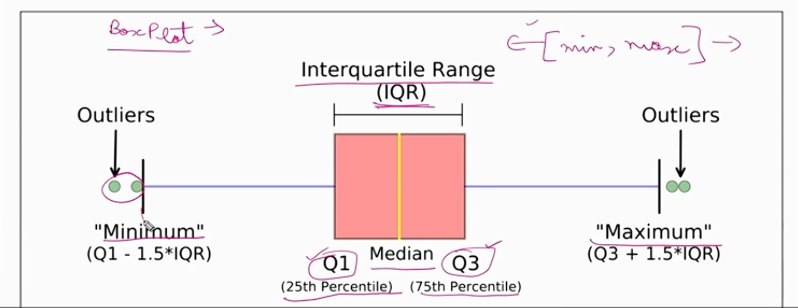

Anything outside min and max range are outliers

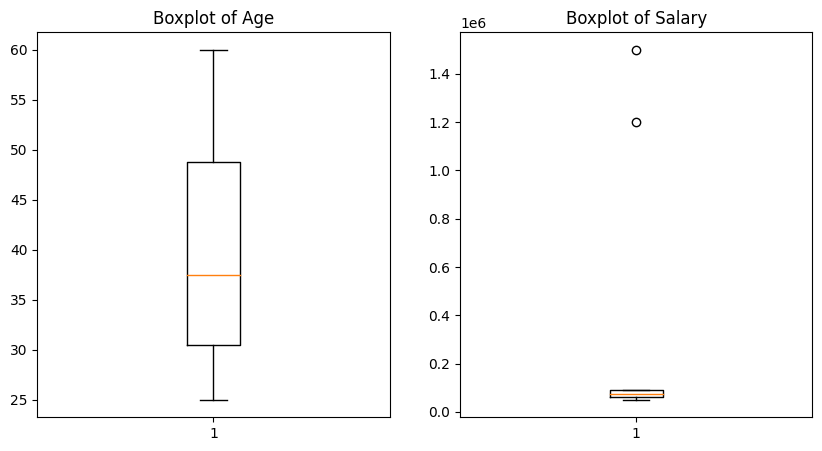

In [4]:
import matplotlib.pyplot as plt

#Boxplot to visualise the outliers in the Age Column
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df['Age'].dropna())
plt.title('Boxplot of Age')

#Boxplot to visualise outliers in the Salary column
plt.subplot(1,2,2)
plt.boxplot(df['Salary'].dropna())
plt.title('Boxplot of Salary')

plt.show()

atleast 2 outliers in salary. No visible outlier in Age(cant confirm)

Identifying outliers using IQR Method


In [23]:
#Calculating IQR

Q1=df[['Age','Salary']].quantile(0.25)
Q3=df[['Age','Salary']].quantile(0.75)
IQR=Q3-Q1


# Printing Outliers

print(df[((df[['Age','Salary']] < (Q1 - 1.5 * IQR)) | (df[['Age','Salary']] > (Q3 + 1.5 * IQR))).any(axis=1)])

  Name  Age   Salary   Department
1  Bob   30  1200000  Engineering
8  Ivy   32  1500000  Engineering


Identifying outliers using Z-Score Method

In [35]:
from scipy import stats

z_scores=stats.zscore(df[['Age','Salary']])
abs_z_scores=abs(z_scores)
filtered_entries=(abs_z_scores < 3).all(axis=1)
df_no_outliers=df[filtered_entries]

print(df[~filtered_entries])
print(df[filtered_entries])



Empty DataFrame
Columns: [Name, Age, Salary, Department]
Index: []
      Name  Age   Salary   Department
0    Alice   25    50000           HR
1      Bob   30  1200000  Engineering
2  Charlie   35    70000  Engineering
3    David   50    60000           HR
4      Eve   28    80000           HR
5    Frank   40    55000        Sales
6    Grace   50    85000        Sales
7     Hank   60    90000        Sales
8      Ivy   32  1500000  Engineering
9     Jack   45    62000  Engineering


**Why the IQR Method Found Outliers and the Z-Score Method Did Not
Data Distribution: If your 'Age' and 'Salary' data are not normally distributed, the Z-Score method might miss outliers that the IQR method can detect.

Skewness and Kurtosis: If your data is skewed or has heavy tails (kurtosis), Z-Scores might not accurately reflect the presence of outliers, whereas the IQR method would still identify them.**

# Handling Outliers
**1 . Capping**

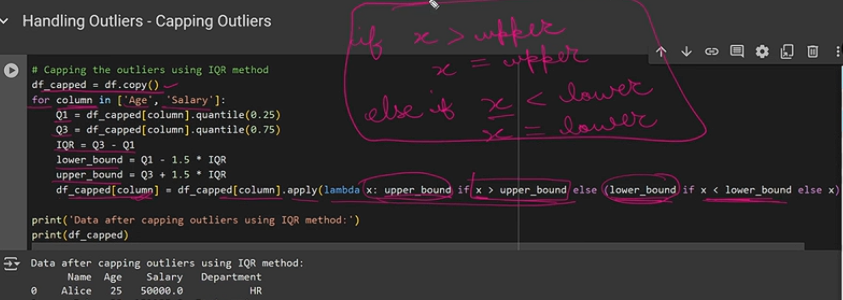

In [36]:
df_capped=df.copy()
for column in ['Age','Salary']:
  Q1=df_capped[column].quantile(0.25)
  Q3=df_capped[column].quantile(0.75)
  IQR=Q3-Q1
  upper_bound=Q3+1.5*IQR
  lower_bound=Q1-1.5*IQR
  df_capped[column]=df_capped[column].apply(lambda x:upper_bound if x>upper_bound else lower_bound if x< lower_bound else x)

print('Data after Capping outliers using IQR method : ')
print(df_capped)

Data after Capping outliers using IQR method : 
      Name  Age    Salary   Department
0    Alice   25   50000.0           HR
1      Bob   30  131125.0  Engineering
2  Charlie   35   70000.0  Engineering
3    David   50   60000.0           HR
4      Eve   28   80000.0           HR
5    Frank   40   55000.0        Sales
6    Grace   50   85000.0        Sales
7     Hank   60   90000.0        Sales
8      Ivy   32  131125.0  Engineering
9     Jack   45   62000.0  Engineering


**2. Replacing with mean/median**

In [40]:
df_replaced=df.copy()
for i in ['Age','Salary']:
  Q1=df_replaced[i].quantile(0.25)
  Q3=df_replaced[i].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  median=df_replaced[i].median()
  df_replaced[i]=df_replaced[i].apply(lambda x : median if x < lower_bound or x > upper_bound else x)

print(df_replaced)

      Name  Age   Salary   Department
0    Alice   25  50000.0           HR
1      Bob   30  75000.0  Engineering
2  Charlie   35  70000.0  Engineering
3    David   50  60000.0           HR
4      Eve   28  80000.0           HR
5    Frank   40  55000.0        Sales
6    Grace   50  85000.0        Sales
7     Hank   60  90000.0        Sales
8      Ivy   32  75000.0  Engineering
9     Jack   45  62000.0  Engineering
